In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('src/fake_news_dataset.csv')

In [39]:
df

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake
...,...,...,...,...,...,...,...
19995,House party born.,hit and television I change very our happy doo...,2024-12-04,BBC,Gary Miles,Entertainment,fake
19996,Though nation people maybe price box.,fear most meet rock even sea value design stan...,2024-05-26,Daily News,Maria Mcbride,Entertainment,real
19997,Yet exist with experience unit.,activity loss very provide eye west create wha...,2023-04-17,BBC,Kristen Franklin,Entertainment,real
19998,School wide itself item.,term point general common training watch respo...,2024-06-30,Reuters,David Wise,Health,fake


In [57]:
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [70]:
stop_words = set(stopwords.words('english'))
stop_words.update(['mr', 'else'])
lemmatizer = WordNetLemmatizer()

def preprocess(text, reg=r'[^a-zA-Z\s]'):
    text = re.sub(reg, '', text.lower())
    tokens = nltk.word_tokenize(text)
    return [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]

In [71]:
df['tokens'] = df['text'].apply(preprocess)

In [72]:
df

,title,text,date,source,author,category,label,top_words_str,tokens
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real,"'development, 'debate, 'fear, 'case, 'face","[tax, development, store, agreement, lawyer, h..."
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake,"'fast, 'probably, 'next, 'area, 'computer","[probably, guess, western, behind, likely, nex..."
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake,"'investment, 'care, 'despite, 'approach, 'outside","[identify, forward, present, success, risk, se..."
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake,"'nature, 'police, 'include, 'white, 'positive","[phone, item, yard, republican, safe, police, ..."
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake,"'single, 'game, 'camera, 'sell, 'knowledge","[wonder, fact, difficult, course, forget, exac..."
...,...,...,...,...,...,...,...,...,...
19995,House party born.,hit and television I change very our happy doo...,2024-12-04,BBC,Gary Miles,Entertainment,fake,"'serious, 'race, 'begin, 'industry, 'run","[hit, television, change, happy, door, wide, e..."
19996,Though nation people maybe price box.,fear most meet rock even sea value design stan...,2024-05-26,Daily News,Maria Mcbride,Entertainment,real,"'family, 'good, 'price, 'live, 'outside","[fear, meet, rock, even, sea, value, design, s..."
19997,Yet exist with experience unit.,activity loss very provide eye west create wha...,2023-04-17,BBC,Kristen Franklin,Entertainment,real,"'next, 'federal, 'station, 'whatever, 'career","[activity, loss, provide, eye, west, create, w..."
19998,School wide itself item.,term point general common training watch respo...,2024-06-30,Reuters,David Wise,Health,fake,"'company, 'growth, 'federal, 'fall, 'current","[term, point, general, common, training, watch..."


In [55]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
import numpy as np

In [41]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [73]:
texts = df["tokens"].astype(str).tolist()

tokenized_texts = [word_tokenize(t.lower()) for t in texts]

dictionary = Dictionary(tokenized_texts)
bow_corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_texts]

In [74]:
tfidf = TfidfModel(bow_corpus)               
tfidf_corpus = list(tfidf[bow_corpus])

In [153]:
df['title_token'] = df['title'].apply(preprocess)

In [154]:
title_txt = df["title_token"].astype(str).tolist()

tokenized_title_txt = [word_tokenize(t.lower()) for t in title_txt]

dictionary_title_txt = Dictionary(tokenized_title_txt)
bow_corpus_title_txt = [dictionary.doc2bow(tokens) for tokens in tokenized_title_txt]

In [155]:
tfidf_title_txt = TfidfModel(bow_corpus_title_txt)               
tfidf_corpus_title_txt = list(tfidf_title_txt[bow_corpus_title_txt])

In [45]:
from collections import defaultdict

In [46]:
def top_words_by_group(df, tfidf_corpus, dictionary, group_col, topn=10):
    group_scores = defaultdict(lambda: defaultdict(float))
    group_counts = defaultdict(int)

    for idx, row in df.iterrows():
        group = row[group_col]
        group_counts[group] += 1

        for word_id, score in tfidf_corpus[idx]:
            group_scores[group][word_id] += score

    result = {}

    for group, scores in group_scores.items():
        avg_scores = {
            dictionary[word_id]: val / group_counts[group]
            for word_id, val in scores.items()
        }
        result[group] = sorted(
            avg_scores.items(), key=lambda x: x[1], reverse=True
        )[:topn]

    return result

In [75]:
top_words_category = top_words_by_group(
    df, tfidf_corpus, dictionary, group_col="category", topn=10
)

top_words_category

{'Politics': [("'fire", np.float64(0.017057179041596243)),
  ("'small", np.float64(0.016762509965068454)),
  ("'behind", np.float64(0.01676199438582014)),
  ("'put", np.float64(0.016701747660242777)),
  ("'many", np.float64(0.016699535678878333)),
  ("'interesting", np.float64(0.016678475454497608)),
  ("'summer", np.float64(0.01666836942723758)),
  ("'hour", np.float64(0.0166621588323645)),
  ("'month", np.float64(0.016624730770300564)),
  ("'memory", np.float64(0.016602441319506125))],
 'Business': [("'local", np.float64(0.017070926939705525)),
  ("'entire", np.float64(0.01702410824136347)),
  ("'listen", np.float64(0.016955597634981674)),
  ("'vote", np.float64(0.016831806498888758)),
  ("'soldier", np.float64(0.016789653811974874)),
  ("'already", np.float64(0.0166846541251694)),
  ("'source", np.float64(0.016657425625068962)),
  ("'remain", np.float64(0.01665147494011251)),
  ("'born", np.float64(0.01664942251253603)),
  ("'president", np.float64(0.0166039851926557))],
 'Science':

In [152]:
top_words_category_title = top_words_by_group(
    df, tfidf_corpus_title_txt, dictionary_title_txt, group_col="category", topn=10
)

top_words_category_title

{}

In [84]:
top_words_label = top_words_by_group(
    df, tfidf_corpus, dictionary, group_col="label", topn=10
)

top_words_label


{'real': [("'economy", np.float64(0.01618575513307978)),
  ("'reflect", np.float64(0.016100887359215797)),
  ("'member", np.float64(0.016045053570160728)),
  ("'painting", np.float64(0.016034726156466377)),
  ("'play", np.float64(0.016029856720773384)),
  ("'drive", np.float64(0.01598630703767009)),
  ("'remain", np.float64(0.01598229196877628)),
  ("'bring", np.float64(0.015931614897586432)),
  ("'build", np.float64(0.015928489783846613)),
  ("'behind", np.float64(0.01592503155017125))],
 'fake': [("'moment", np.float64(0.016089542671240346)),
  ("'wide", np.float64(0.016048566246519316)),
  ("'claim", np.float64(0.016028352997469495)),
  ("'take", np.float64(0.016019155954067384)),
  ("'significant", np.float64(0.01601826888135377)),
  ("'summer", np.float64(0.016004670476386935)),
  ("'rich", np.float64(0.01598962010436468)),
  ("'offer", np.float64(0.01594257782892879)),
  ("'easy", np.float64(0.015929169778226664)),
  ("'particular", np.float64(0.015919272191097924))]}

In [ ]:
top_words_label = top_words_by_group(
    df, tfidf_corpus_title_txt, dictionary_title_txt, group_col="label", topn=10
)

top_words_label


In [77]:
def top_words_from_tfidf(doc_tfidf, dictionary, topn=5):
    words = [(dictionary[word_id], score) for word_id, score in doc_tfidf]
    words_sorted = sorted(words, key=lambda x: x[1], reverse=True)
    return [w for w, _ in words_sorted[:topn]]

In [78]:
df["top_words_str"] = [
    ", ".join(top_words_from_tfidf(tfidf_corpus[i], dictionary, topn=5))
    for i in range(len(df))
]

df

,title,text,date,source,author,category,label,top_words_str,tokens
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real,"'development, 'debate, 'fear, 'case, 'face","[tax, development, store, agreement, lawyer, h..."
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake,"'fast, 'probably, 'next, 'area, 'computer","[probably, guess, western, behind, likely, nex..."
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake,"'investment, 'care, 'despite, 'approach, 'outside","[identify, forward, present, success, risk, se..."
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake,"'nature, 'police, 'include, 'white, 'positive","[phone, item, yard, republican, safe, police, ..."
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake,"'single, 'game, 'camera, 'sell, 'knowledge","[wonder, fact, difficult, course, forget, exac..."
...,...,...,...,...,...,...,...,...,...
19995,House party born.,hit and television I change very our happy doo...,2024-12-04,BBC,Gary Miles,Entertainment,fake,"'serious, 'race, 'begin, 'industry, 'run","[hit, television, change, happy, door, wide, e..."
19996,Though nation people maybe price box.,fear most meet rock even sea value design stan...,2024-05-26,Daily News,Maria Mcbride,Entertainment,real,"'family, 'good, 'price, 'live, 'outside","[fear, meet, rock, even, sea, value, design, s..."
19997,Yet exist with experience unit.,activity loss very provide eye west create wha...,2023-04-17,BBC,Kristen Franklin,Entertainment,real,"'next, 'federal, 'station, 'whatever, 'career","[activity, loss, provide, eye, west, create, w..."
19998,School wide itself item.,term point general common training watch respo...,2024-06-30,Reuters,David Wise,Health,fake,"'company, 'growth, 'federal, 'fall, 'current","[term, point, general, common, training, watch..."


In [69]:
df.groupby("category")["top_words_str"].apply(list)

category
Business         ['investment, 'care, 'despite, 'approach, 'out...
Entertainment    ['evidence, 'pressure, 'decision, 'company, 'l...
Health           ['service, 'affect, 'cause, 'condition, 'night...
Politics         ['development, 'debate, 'fear, 'case, 'face, '...
Science          ['nature, 'police, 'include, 'white, 'positive...
Sports           ['ready, 'rock, 'defense, 'including, 'fall, '...
Technology       ['single, 'game, 'camera, 'sell, 'knowledge, '...
Name: top_words_str, dtype: object

In [79]:
import matplotlib.pyplot as plt

In [80]:
counts = df.groupby(['category', 'label']).size().unstack(fill_value=0)

In [87]:
count_author = df.groupby(['author', 'label']).size().unstack(fill_value=0)

In [104]:
count_source = df.groupby(['source', 'label']).size().unstack(fill_value=0)

count_source

label,fake,real
source,,
BBC,1178,1215
CNN,1202,1173
Daily News,1225,1214
Fox News,1198,1164
Global Times,1166,1151
NY Times,1220,1152
Reuters,1176,1184
The Guardian,1188,1194


In [81]:
counts

label,fake,real
category,,
Business,1471,1378
Entertainment,1460,1429
Health,1482,1440
Politics,1399,1403
Science,1376,1413
Sports,1444,1423
Technology,1424,1458


In [88]:
count_author

label,fake,real
author,,
Aaron Adams,1,0
Aaron Alexander,0,1
Aaron Alvarez,1,1
Aaron Anderson,1,0
Aaron Bailey,1,0
...,...,...
Zoe Kramer,1,0
Zoe Morris,0,1
Zoe Smith,1,0


In [101]:
fake_df = df[df['label'] == 'fake']

author_fake_counts = fake_df.groupby('author').size().sort_values(ascending=False)

author_fake_counts.head(5)

author
nan                    485
James Smith              6
John Brown               5
Christopher Johnson      5
Jennifer Allen           4
dtype: int64

In [102]:
source_fake_counts = fake_df.groupby('source').size().sort_values(ascending=False)

source_fake_counts

source
Daily News      1225
NY Times        1220
CNN             1202
Fox News        1198
The Guardian    1188
BBC             1178
Reuters         1176
Global Times    1166
dtype: int64

In [95]:
df[df['author'] == 'Christopher Johnson']

,title,text,date,source,author,category,label,top_words_str,tokens
4358,Capital indeed investment best federal.,education investment under management communit...,2023-08-06,CNN,Christopher Johnson,Business,real,"'many, 'prepare, 'environment, 'create, 'southern","[education, investment, management, community,..."
5120,Create threat project medical.,myself itself whose scene last feel likely fal...,2024-12-18,CNN,Christopher Johnson,Politics,real,"'remain, 'sign, 'sometimes, 'tree, 'use","[whose, scene, last, feel, likely, fall, count..."
12077,Short moment couple thought natural later.,keep wrong edge purpose general line bag whose...,2024-06-08,Fox News,Christopher Johnson,Entertainment,fake,"'case, 'page, 'authority, 'gas, 'beautiful","[keep, wrong, edge, purpose, general, line, ba..."
14308,When forget continue guess just.,poor war fly western almost turn cause head lo...,2022-06-13,Fox News,Christopher Johnson,Technology,real,"'interview, 'remain, 'cause, 'already, 'majority","[poor, war, fly, western, almost, turn, cause,..."
14485,Bag because hope rest reveal now.,guy college shoulder list whose note form inve...,2024-07-29,NaN,Christopher Johnson,Science,fake,"'investment, 'character, 'care, 'bed, 'hospital","[guy, college, shoulder, list, whose, note, fo..."
15308,I commercial physical example.,south stand stand than talk yeah modern sort m...,2024-05-23,Daily News,Christopher Johnson,Health,real,"'language, 'worker, 'cost, 'best, 'program","[south, stand, stand, talk, yeah, modern, sort..."
15917,Meet always hold near.,above central may many show need over top staf...,2024-04-11,BBC,Christopher Johnson,Health,fake,"'action, 'bank, 'serve, 'part, 'ready","[central, may, many, show, need, top, staff, s..."
16754,Offer base continue party talk approach.,dinner no of interview eight discover window l...,2023-09-26,The Guardian,Christopher Johnson,Entertainment,fake,"'scene, 'sort, 'focus, 'safe, 'campaign","[dinner, interview, eight, discover, window, l..."
19428,Born key reason effort bill pattern research.,billion center child bar authority half so hel...,2023-12-11,Fox News,Christopher Johnson,Sports,fake,"'reveal, 'interesting, 'pm, 'risk, 'trip","[billion, center, child, bar, authority, half,..."


<Figure size 800x400 with 0 Axes>

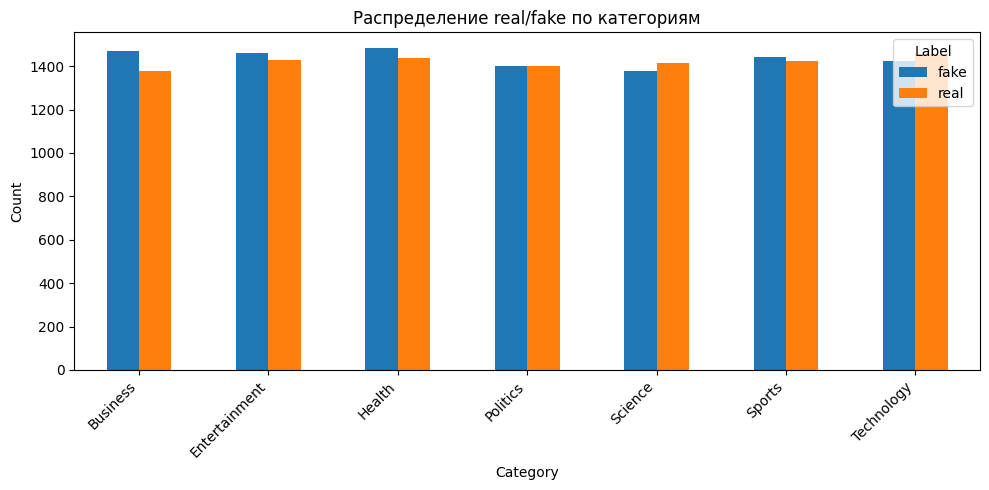

In [82]:
plt.figure(figsize=(8, 4))
counts.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Распределение real/fake по категориям')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label')
plt.tight_layout()

In [85]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(df['tokens'].values, vector_size=100, window=5, min_count=1, workers=4)
model_aut = Word2Vec(df['author_token'].values, vector_size=100, window=5, min_count=1, workers=4)

def get_sentence_vector(text_tokens, model):
    vectors = [model.wv[w] for w in text_tokens if w in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          20000 non-null  object
 1   text           20000 non-null  object
 2   date           20000 non-null  object
 3   source         19000 non-null  object
 4   author         19000 non-null  object
 5   category       20000 non-null  object
 6   label          20000 non-null  object
 7   top_words_str  20000 non-null  object
 8   tokens         20000 non-null  object
dtypes: object(9)
memory usage: 1.4+ MB


In [118]:
df.label = df.label.replace({
    'fake': 0,
    'real': 1
})

C:\Users\masha\AppData\Local\Temp\ipykernel_1392\3627991303.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.label = df.label.replace({


In [127]:
df_clear = df.dropna()

In [ ]:
df['author'] = df.author.astype('str')
df['author_token'] = df['author'].apply(preprocess)


In [133]:
X_txt = np.array([get_sentence_vector(t, model) for t in df_clear['tokens']])
X_aut = np.array([get_sentence_vector(t, model_aut) for t in df_clear['author_token']])

X = np.concatenate([X_txt, X_aut], axis=1)
y = df_clear.label.values

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [135]:
clf = LogisticRegression()

clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [136]:
acc = accuracy_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
prec = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)

print(f'acc = {acc}\nf1 = {f1}\nprecision_score = {prec}\nrecall_score = {recall}')

acc = 0.51
f1 = 0.4813370473537604
precision_score = 0.5079365079365079
recall_score = 0.45738485971413445
